Mean Squared Error:  0.014359759574463928


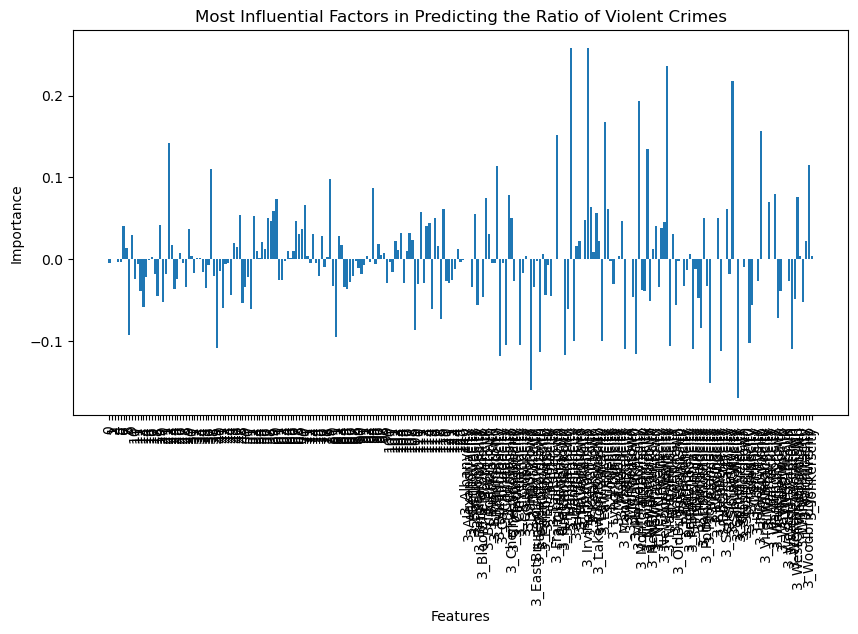

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data as a DataFrame, specifying that '?' should be treated as NaN
data = pd.read_csv('communities.data', header=None, na_values='?')

# Drop rows with missing values (NaN) in any column
data = data.dropna()

# Assuming the last column is the target variable (violent crimes ratio) and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Convert non-numeric columns to numeric using one-hot encoding
X = pd.get_dummies(X)

# Convert all column names to strings
X.columns = X.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

importances = model.coef_
features = list(X.columns)  # Get the column names after one-hot encoding

plt.figure(figsize=(10, 5))
plt.bar(features, importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Most Influential Factors in Predicting the Ratio of Violent Crimes')
plt.xticks(rotation=90)  # Rotate the x-axis labels for readability
plt.show()
